In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [29]:
df = pd.read_csv('train.csv')
df.head()

,from,style,body,color,fuel,model_date,doors,production_date,transmission,engine_displacement,...,wheel,condition,owners,generation,restyling,age,description,features,price,brand
0,all_autoru,1.6 AT (150 л.с.),седан,коричневый,бензин,2010,5,2015,автоматическая,1.6,...,Левый,Не требует ремонта,2,2,0.0,5.0,"Две владелицы, девушки, у авто настоящий пробе...","['Круиз-контроль', 'Электростеклоподъёмники пе...",550000,citroen
1,all_autoru,1.6 AT (109 л.с.),хэтчбек,белый,бензин,2012,5,2015,автоматическая,1.6,...,Левый,Не требует ремонта,1,1,1.0,5.0,Автомобиль принят по программе Trade in.Провед...,"['Тёмный салон', 'Ткань (Материал салона)']",525000,chevrolet
2,all_autoru,2.0 MT (145 л.с.),седан,серебристый,бензин,2000,5,2001,механическая,2.0,...,Левый,Не требует ремонта,3,3,0.0,19.0,"Требуется ремонт спидопетра,новая резина.Мотор...",[],170000,ford
3,all_autoru,320 3.2 AT (220 л.с.),купе-хардтоп,чёрный,бензин,1992,4,1994,автоматическая,3.2,...,Левый,Не требует ремонта,3,1,0.0,26.0,Продаю купе 124 спортлайн в хорошей комплектац...,"['Круиз-контроль', 'Электростеклоподъёмники пе...",950000,mercedes
4,all_autoru,1.6 AT (123 л.с.),седан,коричневый,бензин,2015,5,2015,автоматическая,1.6,...,Левый,Не требует ремонта,2,3,1.0,5.0,Автомобиль свой личный я сам своим личным дело...,"['Подушка безопасности водителя', 'Крепление д...",550000,kia


Удалим из датасета такие параметры как from, style, color, description. В рамках обработки датасета они несут очень много лишней информации, которую тяжело трансформировать в нормальный формат и/или данные на данном этапе могут привнести проблемы с обучением.

In [30]:
df.drop(['style', 'color', 'description', 'from'], axis=1, inplace=True)

In [31]:
df['features'] = df['features'].apply(lambda x: len(x.split(",")) if (len(x.split(",")) != 1) & (x != 'Unknown')  else 0)
df['generation'] = df['generation'].apply(lambda x: x if x != 'Unknown' else 0)
df['condition'] = df['condition'].apply(lambda x: 1 if x == 'Не требует ремонта' else 0)
df['engine_displacement'] = df['engine_displacement'].apply(lambda x: x if x != 'Electro' else 0) 

In [32]:
model_old = df['production_date'] - df['model_date']
df['model_old'] = model_old
df.drop(['production_date'], axis=1, inplace=True)

Учитывать каждый атрибут элемента features и давать ему свой вариант является глупым решением. Посмотрим на дальнейшую корреляцию этого пункта и стоимости машины, тогда будем решать стоит его оставлять или нет. На данный момент есть предположение, что машина, которая имеет большее количество дополнительных атрибутов стоит больше 

In [33]:

df['fuel'] = df['fuel'].apply(lambda x: 'газ' if x == 'газ, газобаллонное оборудование' else x)

Кажется, что это одно и то же

In [34]:
fuel_features = df[['fuel']]
transmission_features = df[['transmission']]
body_features = df[['body']]
wheel_features = df[['wheel']]
drive_type_features = df[['drive_type']]
brand_features = df[['brand']]

In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_fuel = OneHotEncoder()
cat_encoder_transmission = OneHotEncoder()  
cat_encoder_body = OneHotEncoder() 
cat_encoder_wheel = OneHotEncoder()
cat_encoder_brand = OneHotEncoder()
cat_encoder_drive_type = OneHotEncoder()

df_prev = df.copy()

df['fuel_encoded'] = cat_encoder_fuel.fit_transform(fuel_features).toarray().tolist()
df['transmission_encoded'] = cat_encoder_transmission.fit_transform(transmission_features).toarray().tolist()
df['body_encoded'] = cat_encoder_body.fit_transform(body_features).toarray().tolist()
df['wheel_encoded'] = cat_encoder_wheel.fit_transform(wheel_features).toarray().tolist()
df['brand_encoded'] = cat_encoder_brand.fit_transform(brand_features).toarray().tolist()
df['drive_type_encoded'] = cat_encoder_drive_type.fit_transform(drive_type_features).toarray().tolist()

df[['fuel_encoded_'+str(i) for i in range(len(df['fuel_encoded'][0]))]] = pd.DataFrame(df['fuel_encoded'].tolist(), index=df.index)
df[['transmission_encoded_'+str(i) for i in range(len(df['transmission_encoded'][0]))]] = pd.DataFrame(df['transmission_encoded'].tolist(), index=df.index)
df[['body_encoded_'+str(i) for i in range(len(df['body_encoded'][0]))]] = pd.DataFrame(df['body_encoded'].tolist(), index=df.index)
df[['wheel_encoded_'+str(i) for i in range(len(df['wheel_encoded'][0]))]] = pd.DataFrame(df['wheel_encoded'].tolist(), index=df.index)
df[['brand_encoded_'+str(i) for i in range(len(df['brand_encoded'][0]))]] = pd.DataFrame(df['brand_encoded'].tolist(), index=df.index)
df[['drive_type_encoded_'+str(i) for i in range(len(df['drive_type_encoded'][0]))]] = pd.DataFrame(df['drive_type_encoded'].tolist(), index=df.index)


In [36]:
df.drop(['fuel', 'transmission', 'body', 'wheel', 'drive_type', 'brand', 'fuel_encoded', 'transmission_encoded', 'body_encoded', 'wheel_encoded', 'drive_type_encoded', 'brand_encoded'], axis=1, inplace=True)
df.head()

,model_date,doors,engine_displacement,engine_power,mileage,condition,owners,generation,restyling,age,...,brand_encoded_12,brand_encoded_13,brand_encoded_14,brand_encoded_15,brand_encoded_16,brand_encoded_17,brand_encoded_18,drive_type_encoded_0,drive_type_encoded_1,drive_type_encoded_2
0,2010,5,1.6,150,100000,1,2,2,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2012,5,1.6,109,75550,1,1,1,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2000,5,2.0,145,315000,1,3,3,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1992,4,3.2,220,225000,1,3,1,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2015,5,1.6,123,280000,1,2,3,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Отлично, операция по дата препроцессингу завершена, теперь посмотрим на взаимосвязь фич и ценник машины

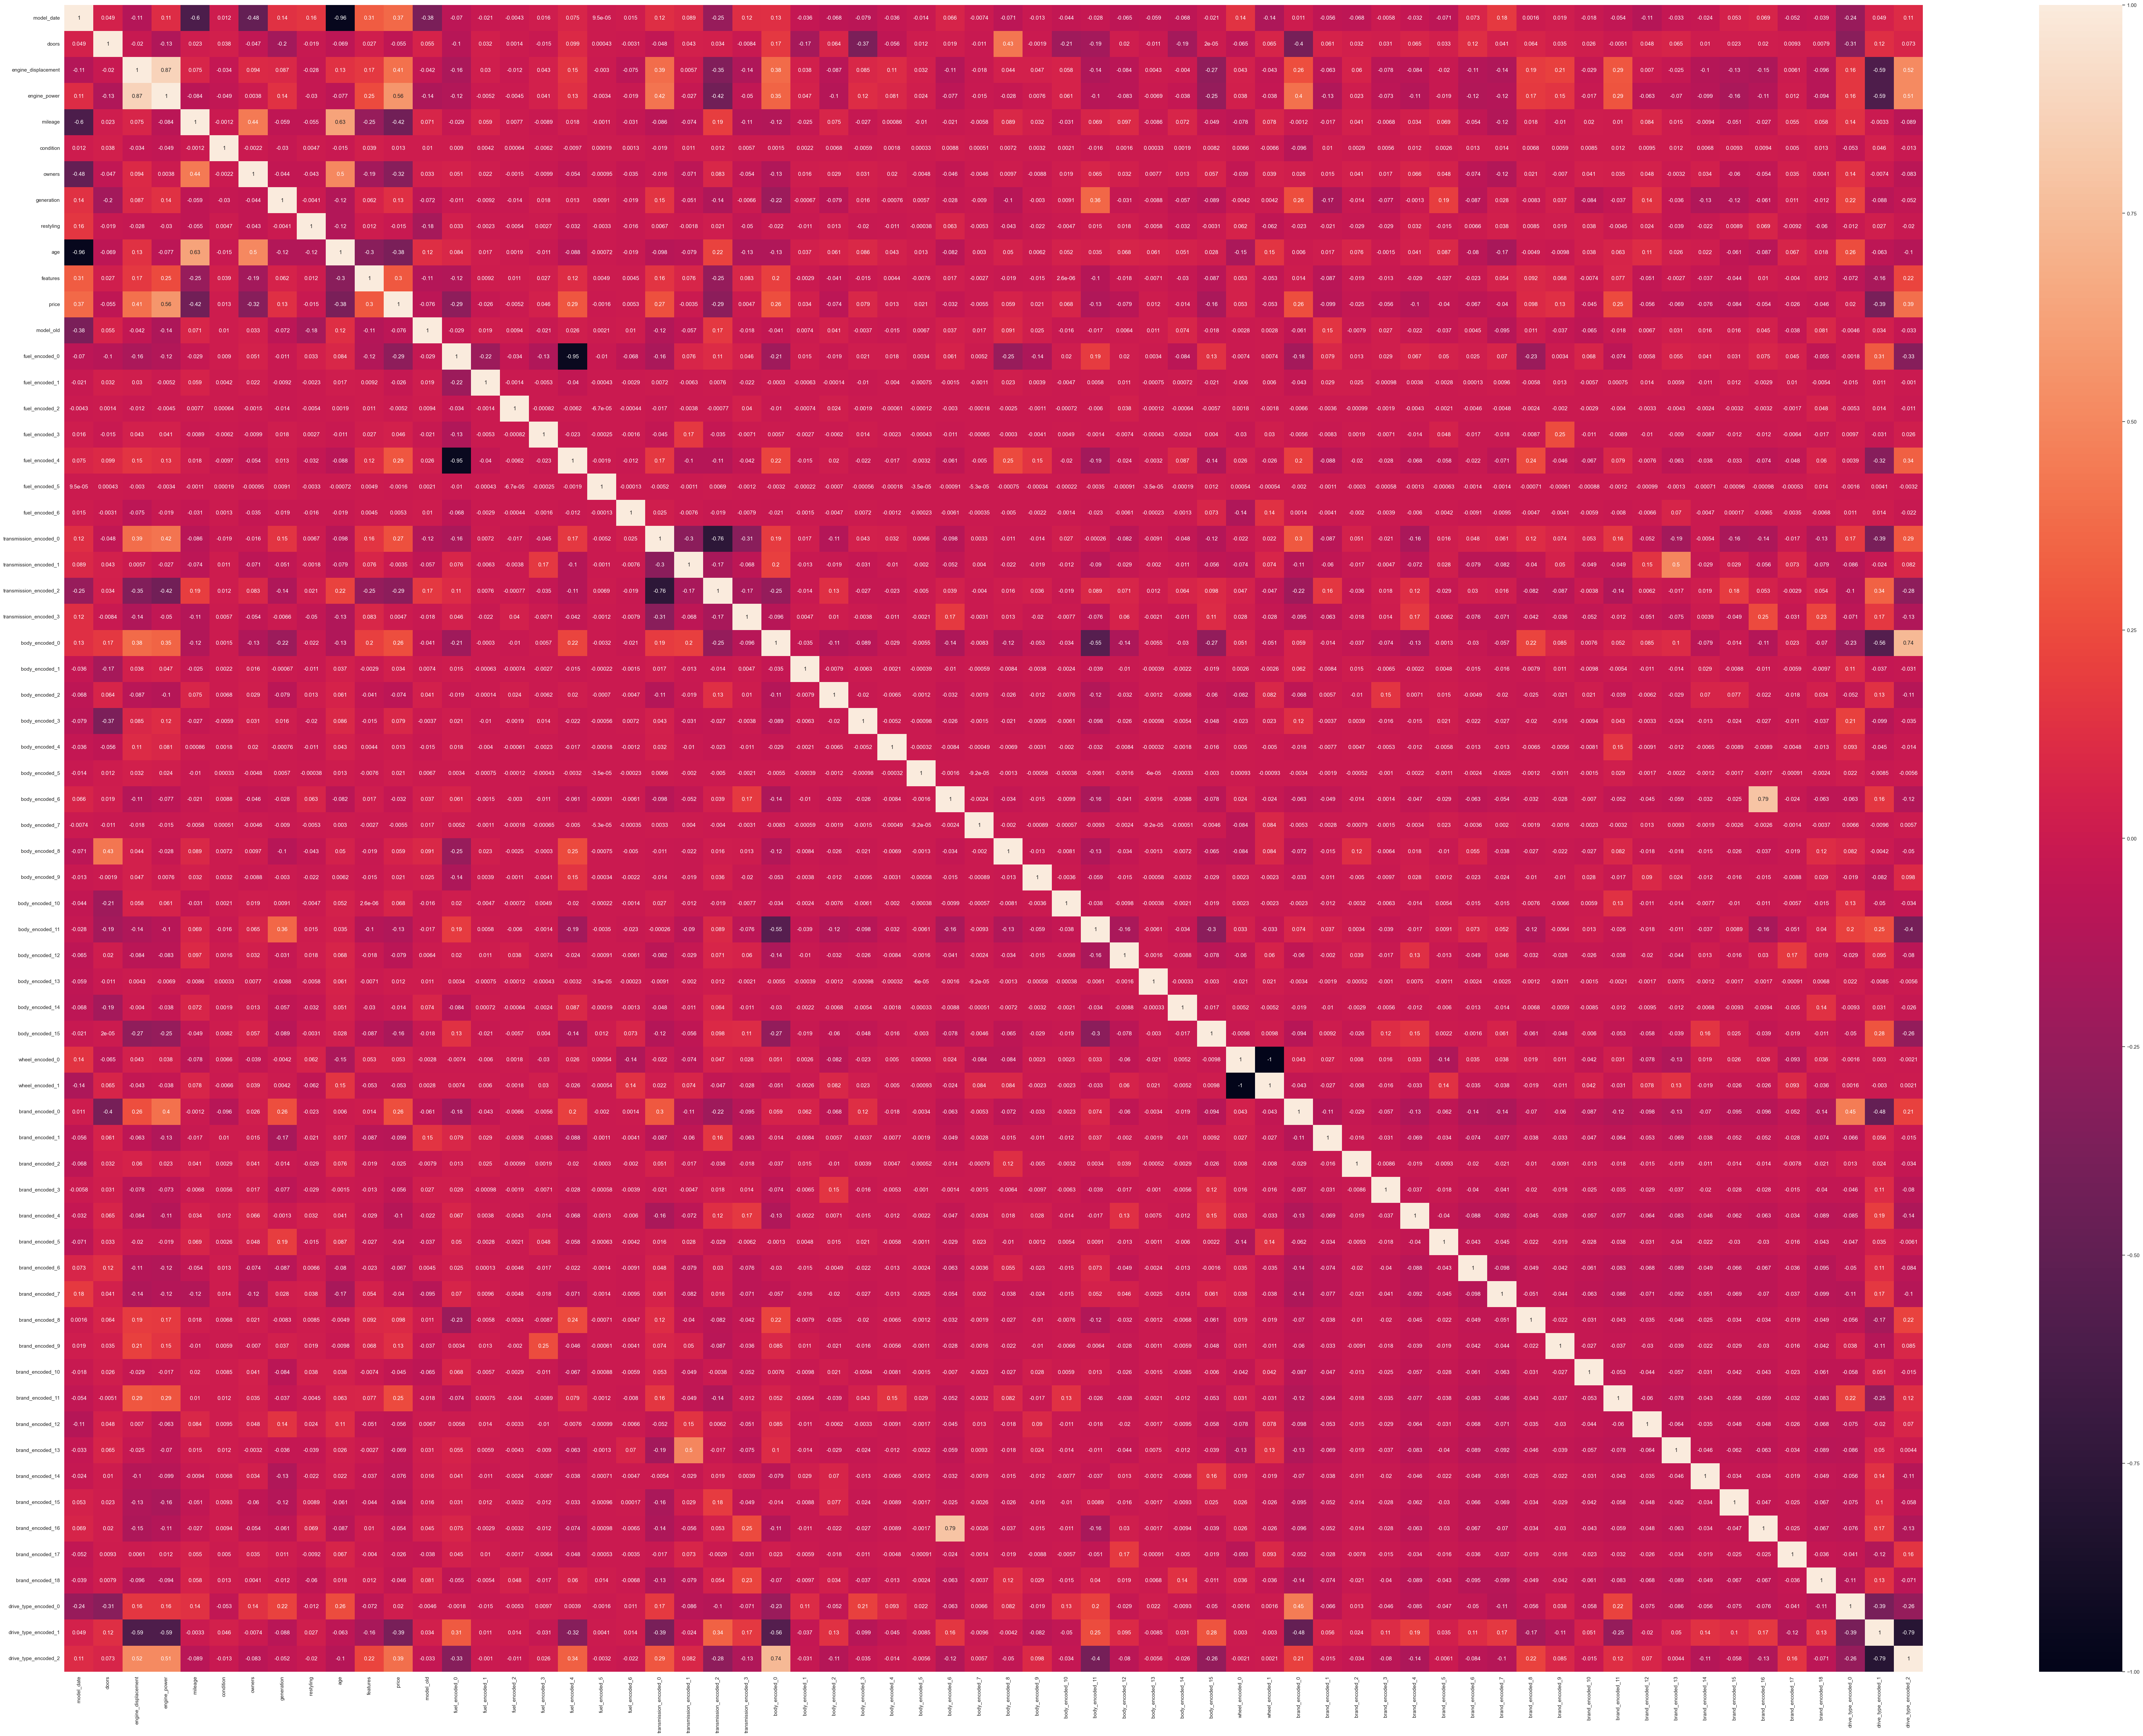

In [40]:
sns.heatmap(df.corr(), annot=True)
sns.set_theme(rc={'figure.figsize':(120,90)})
plt.show()

ХВХВАХВАХВАХВХАВХАХАХАХВАХВАХВАХВАХВАХВАХАХВахвхахавхва\хавхХАХАВХЫХВХЫВХАЫХАХВЫЗАХЗЫХЗВызхавзвфхХЫАЗВАХВЗЫХАЗЫХАЫХЗЫХЗВЗАХ

In [41]:
df.to_csv('train_prepared.csv', index=False)